In [ ]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import requests

In [ ]:
def iupac_to_smiles(iupac_name: str):
    # PubChem PUG REST API URL
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{iupac_name}/property/SMILES/json'

    # Send a GET request to the API
    response = requests.get(url)

    # Check if the response was successful
    if response.status_code == 200:
        data = response.json()
        
        # Check if SMILES data is in the response
        if 'PropertyTable' in data and 'Properties' in data['PropertyTable']:
            # Extract SMILES from the response
            smiles = data['PropertyTable']['Properties'][0].get('SMILES', None)
            if smiles:
                return smiles
            else:
                return "SMILES not found for this molecule."
        else:
            return "No SMILES data found in the response."
    else:
        return f"Error fetching data: {response.status_code}"

# Example usage
iupac_name = "acetone"
smiles = iupac_to_smiles(iupac_name)
print(f"SMILES for {iupac_name}: {smiles}")

AttributeError: module 'rdkit.Chem' has no attribute 'MolFromIUPACName'

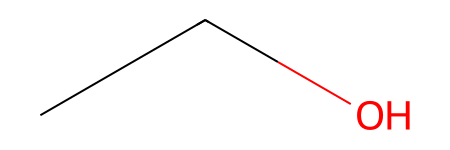

In [13]:
molecule = Chem.MolFromSmiles(a.isomeric_smiles)
molecule

In [ ]:
def predict_nmr_shifts(molecule):
    # Add hydrogens to the molecule
    mol = Chem.AddHs(molecule)

    # Predict NMR shifts
    nmr_shifts = AllChem.PredictNMRShifts(mol)

    # Create a DataFrame with the predicted shifts
    data = {
        'Atom Index': [atom.GetIdx() for atom in mol.GetAtoms()],
        'Element': [atom.GetSymbol() for atom in mol.GetAtoms()],
        'NMR Shift (ppm)': nmr_shifts
    }
    df = pd.DataFrame(data)
    return df

predict_nmr_shifts(molecule)

AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'PredictNMRShifts'

In [ ]:
def main(iupac_name):
    # Get the molecule from PubChem
    compound = get_molecule_from_iupac(iupac_name)

    # Convert the PubChem compound to an RDKit molecule
    mol = Chem.MolFromSmiles(compound.isomeric_smiles)

    # Predict NMR shifts and create a DataFrame
    nmr_df = predict_nmr_shifts(mol)

    # Print the DataFrame
    print(nmr_df)